# NOAA Global Surface Summary of the Day LSTM Machine Learning Demo

This notebook demonstrates a basic long-short-term-memory (LSTM) machine learning project with the NOAA Global Surface Summary of the Day (GSOD) dataset. 

The dataset includes all the GSOD variables from 1979 to 2024 for the Exeter weather station. 

### Setup

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [120]:
df = pd.read_csv("Data/NOAA_GSOD_Exeter_1979_2024.csv")
df

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,3839099999,1979-01-04,24.1,0,999.9,37.4,30.2,29.9,0.00,1002.9,1.6,999.9,33.9,14.0,23.4
1,3839099999,1979-01-05,20.7,0,999.9,30.2,21.2,31.1,0.00,1021.1,1.2,999.9,27.4,11.3,14.9
2,3839099999,1979-01-06,20.7,0,999.9,32.0,15.8,1.9,0.00,1028.7,1.2,999.9,24.3,5.0,1.1
3,3839099999,1979-01-07,43.0,10000,999.9,48.2,28.4,9.9,0.01,1025.7,0.8,999.9,44.5,9.6,6.7
4,3839099999,1979-01-08,43.9,110000,999.9,48.2,42.8,5.1,0.04,1019.6,999.9,999.9,45.7,9.4,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16352,3839099999,2023-12-31,41.6,10000,32.1,51.8,44.6,20.0,99.99,9999.9,999.9,999.9,47.6,6.2,14.9
16353,3839099999,2024-01-01,45.2,10000,999.9,51.8,41.0,17.1,99.99,9999.9,999.9,999.9,48.1,5.6,10.4
16354,3839099999,2024-01-02,48.4,10000,46.0,57.2,48.2,29.9,99.99,9999.9,999.9,999.9,52.1,5.7,15.8
16355,3839099999,2024-01-03,44.9,10000,22.9,51.8,46.4,14.0,99.99,9999.9,999.9,999.9,49.1,6.1,9.6


### Clean up Data

#### Drop dupliccates and order by date

In [121]:
# Drop duplicates based on the DATE column.
df = df.drop_duplicates(subset="DATE")

# Convert date column to datetime and then sort the df by date
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values(by="DATE")
df

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,3839099999,1979-01-04,24.1,0,999.9,37.4,30.2,29.9,0.00,1002.9,1.6,999.9,33.9,14.0,23.4
1,3839099999,1979-01-05,20.7,0,999.9,30.2,21.2,31.1,0.00,1021.1,1.2,999.9,27.4,11.3,14.9
2,3839099999,1979-01-06,20.7,0,999.9,32.0,15.8,1.9,0.00,1028.7,1.2,999.9,24.3,5.0,1.1
3,3839099999,1979-01-07,43.0,10000,999.9,48.2,28.4,9.9,0.01,1025.7,0.8,999.9,44.5,9.6,6.7
4,3839099999,1979-01-08,43.9,110000,999.9,48.2,42.8,5.1,0.04,1019.6,999.9,999.9,45.7,9.4,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16352,3839099999,2023-12-31,41.6,10000,32.1,51.8,44.6,20.0,99.99,9999.9,999.9,999.9,47.6,6.2,14.9
16353,3839099999,2024-01-01,45.2,10000,999.9,51.8,41.0,17.1,99.99,9999.9,999.9,999.9,48.1,5.6,10.4
16354,3839099999,2024-01-02,48.4,10000,46.0,57.2,48.2,29.9,99.99,9999.9,999.9,999.9,52.1,5.7,15.8
16355,3839099999,2024-01-03,44.9,10000,22.9,51.8,46.4,14.0,99.99,9999.9,999.9,999.9,49.1,6.1,9.6


#### Create index and feature columns

In [122]:
# Add the dates as the dataframe index. 
df.index = pd.to_datetime(df["DATE"])

# Identify and store the columns we want to use for this project. 
feature_columns = [ 'TEMP', 'DEWP', 'MXSPD', 'SLP', 'STP', 'VISIB', 'GUST', 'WDSP', 'MXSPD', 'MAX', 'MIN', 'PRCP', 'SNDP']

# Create a dataframe using the columns.
df_features = df[feature_columns]
df_features.head()

,TEMP,DEWP,MXSPD,SLP,STP,VISIB,GUST,WDSP,MXSPD,MAX,MIN,PRCP,SNDP
DATE,,,,,,,,,,,,,
1979-01-04,33.9,24.1,29.9,1002.9,999.9,14.0,999.9,23.4,29.9,37.4,30.2,0.00,1.6
1979-01-05,27.4,20.7,31.1,1021.1,999.9,11.3,999.9,14.9,31.1,30.2,21.2,0.00,1.2
1979-01-06,24.3,20.7,1.9,1028.7,999.9,5.0,999.9,1.1,1.9,32.0,15.8,0.00,1.2
1979-01-07,44.5,43.0,9.9,1025.7,999.9,9.6,999.9,6.7,9.9,48.2,28.4,0.01,0.8
1979-01-08,45.7,43.9,5.1,1019.6,999.9,9.4,999.9,2.8,5.1,48.2,42.8,0.04,999.9


#### Null Values and Outliers

In [123]:
def mask_values(df, values_to_mask, new_value):
    """
    Masks specified values in a DataFrame and replaces them with a specified value.

    Parameters:
    df (pandas.DataFrame): The DataFrame in which to mask the specified values.
    values_to_mask: An array of values to replace.
    new_value: The new value you wish to replace the values with in values_to_mask.

    Returns:
    pandas.DataFrame: A new DataFrame with the specified values replaced with a new value.
    """
    df_masked = df.mask(df.isin(values_to_mask), new_value)
    return df_masked
    

In [124]:
# Whilst there are no null values in the dataset,by reading the dataset documentation it is clear that there are lots of missing values. 
# These are imputed with all 9 numbers. Lets replace these values with NaN representing missing values and re-assess the dataset. 

# Define the values to replace - these are specified in the dataset documentation. 
values_to_mask = [9999.9, 999.9, 99.99]

# Call the mask_values function and pass the dataframe, an array of values to mask and a new value of Nan.
df_features = mask_values(df_features, values_to_mask, np.nan)


In [125]:
def print_null_percent(df):
    """
    Prints the count and percentage of null values in each column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which to calculate and print 
                           the count and percentage of missing values.
    """
    missing_count = df.isna().sum()
    missing_percentage = missing_count / len(df) * 100
    formatted_percentage = missing_percentage.apply(lambda x: f"{x:.1f}%")

   # Create a new DataFrame with both counts and formatted percentages
    result_df = pd.DataFrame({
        'Count': missing_count,
        'Percent': formatted_percentage
    })
    
    print("PERCENTAGE OF NULL VALUES\n")
    print(result_df)
    
# Use the print_null_percent function to re-assess the dataset for null values. 
print_null_percent(df_features)

PERCENTAGE OF NULL VALUES

       Count Percent
TEMP       0    0.0%
DEWP      58    0.4%
MXSPD     72    0.4%
SLP    11834   72.3%
STP    16357  100.0%
VISIB     51    0.3%
GUST   13332   81.5%
WDSP       6    0.0%
MXSPD     72    0.4%
MAX       11    0.1%
MIN       12    0.1%
PRCP    4635   28.3%
SNDP   16282   99.5%


In [126]:
# Drop columns with high % of null values.

df_features = df_features.drop(columns=["SLP", "STP", "SNDP"])
print_null_percent(df_features)

PERCENTAGE OF NULL VALUES

       Count Percent
TEMP       0    0.0%
DEWP      58    0.4%
MXSPD     72    0.4%
VISIB     51    0.3%
GUST   13332   81.5%
WDSP       6    0.0%
MXSPD     72    0.4%
MAX       11    0.1%
MIN       12    0.1%
PRCP    4635   28.3%


In [127]:
# Fill columns with 0 values where the null values are likely to represent 0 or close to it.

df_features[["GUST", "PRCP"]] = df_features[["GUST", "PRCP"]].fillna(0)
print_null_percent(df_features)

PERCENTAGE OF NULL VALUES

       Count Percent
TEMP       0    0.0%
DEWP      58    0.4%
MXSPD     72    0.4%
VISIB     51    0.3%
GUST       0    0.0%
WDSP       6    0.0%
MXSPD     72    0.4%
MAX       11    0.1%
MIN       12    0.1%
PRCP       0    0.0%


In [128]:
# Fill nan values with an average value for small % of null values
# As the data is a time series we can presume the value will be close to the previous and next value.

df_features = df_features.interpolate(method='linear')
print_null_percent(df_features)

PERCENTAGE OF NULL VALUES

       Count Percent
TEMP       0    0.0%
DEWP       0    0.0%
MXSPD      0    0.0%
VISIB      0    0.0%
GUST       0    0.0%
WDSP       0    0.0%
MXSPD      0    0.0%
MAX        0    0.0%
MIN        0    0.0%
PRCP       0    0.0%


In [129]:
df_features

,TEMP,DEWP,MXSPD,VISIB,GUST,WDSP,MXSPD,MAX,MIN,PRCP
DATE,,,,,,,,,,
1979-01-04,33.9,24.1,29.9,14.0,0.0,23.4,29.9,37.4,30.2,0.00
1979-01-05,27.4,20.7,31.1,11.3,0.0,14.9,31.1,30.2,21.2,0.00
1979-01-06,24.3,20.7,1.9,5.0,0.0,1.1,1.9,32.0,15.8,0.00
1979-01-07,44.5,43.0,9.9,9.6,0.0,6.7,9.9,48.2,28.4,0.01
1979-01-08,45.7,43.9,5.1,9.4,0.0,2.8,5.1,48.2,42.8,0.04
...,...,...,...,...,...,...,...,...,...,...
2023-12-31,47.6,41.6,20.0,6.2,32.1,14.9,20.0,51.8,44.6,0.00
2024-01-01,48.1,45.2,17.1,5.6,0.0,10.4,17.1,51.8,41.0,0.00
2024-01-02,52.1,48.4,29.9,5.7,46.0,15.8,29.9,57.2,48.2,0.00


### Feature Selection

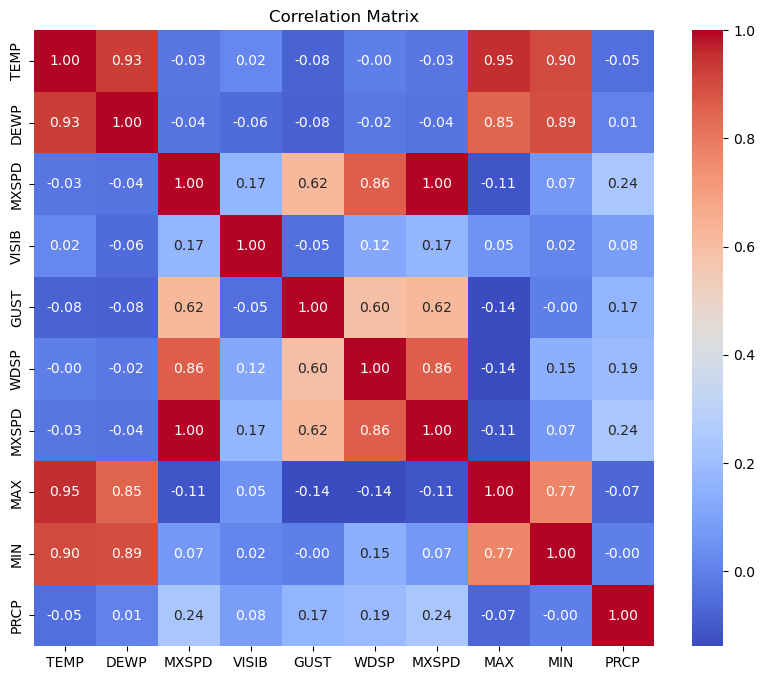

In [130]:
# A Corrilation Matrix could be useful to anaylse which features have a strong correlation with the target variable TEMP to help with feature selection. 

correlation_matrix = df_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Scaling

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create a scaler object using the sklearn Standard Scaler (you could try the MinMaxScaler later to see if it improves accuracy).
scaler = StandardScaler()

# Apply the scaler to the dataframe. 
scaled_data = scaler.fit_transform(df_features)

### Create Sequences for LSTM Model

In [132]:
# Define sequence length and features
target_column = 0
num_lead_days = 5
sequence_length = 28
num_features = len(df_features.columns)

# Create sequences and labels function
def create_sequences_and_labels(num_lead_days, sequence_length, num_features, target_column_index):
  """
  Create sequences and corresponding labels from scaled data for time series forecasting.
  This function generates overlapping sequences of a specified length from the input data,
  along with labels that represent the target value to predict after a specified number of lead days.

  Parameters:
  ----------
  num_lead_days : int
      The number of days to look ahead for the label (target value).
  sequence_length : int
      The length of each sequence to be created from the scaled data.
  num_features : int
      The number of features in the input data (not directly used in this function).
  target_column_index : int
      The index of the target column for labels in the dataframe. 

  Returns:
  -------
  sequences : numpy.ndarray
      A 3D array of shape (num_samples, sequence_length, num_features) containing the input sequences.
  labels : numpy.ndarray
      A 1D array of shape (num_samples,) containing the corresponding labels for each sequence.
  """

  # Create objects to store the time-sequences and labels. 
  sequences = []
  labels = []
    
  # Loop through the range of indices in scaled_data, adjusting for sequence length and lead days
  for i in range(len(scaled_data) - sequence_length - num_lead_days):
    
    # Extract a subsequence of data from scaled_data starting at index i
    seq = scaled_data[i:i+sequence_length]
    
    # Get the target label from scaled_data, offset by sequence length and lead days
    label = scaled_data[(i + sequence_length + num_lead_days)][target_column_index] # target column
    
    # Add the sequences and labels we created to the lists.    
    sequences.append(seq)
    labels.append(label)

  # Convert to numpy arrays
  sequences = np.array(sequences)
  labels = np.array(labels)

  return sequences, labels


# Store sequences and labels
sequences, labels = create_sequences_and_labels(num_lead_days, sequence_length, num_features, target_column)


### Split Data for Training

In [133]:
# Identify training / test data split. 
train_size = int(0.8 * len(sequences))

# Create training and test data.
X_train, X_test = sequences[: train_size], sequences[train_size :]
y_train, y_test = labels[: train_size], labels[train_size :]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13059, 28, 10), (13059,), (3265, 28, 10), (3265,))

### Create Model

In [134]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [135]:
# Define model
def create_model():
  model = Sequential()

  model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
  model.add(LSTM(units=32, return_sequences=True))
  model.add(Dropout(0.1))

  model.add(LSTM(units=16, return_sequences=False))
  model.add(Dropout(0.1))

  # Dense output layer
  model.add(Dense(units=1))

  return model

# Create the model
model = create_model()

# Compile the model
model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.005),
              loss = tf.losses.MeanSquaredError())


In [136]:
# Define callbacks

# Stops training when val_loss stops improving. 
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
# Saves weights.
model_checkpoint = ModelCheckpoint('best_model_weights/best_model_weights.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size=64,
    validation_split = 0.2,
    callbacks = [early_stopping, model_checkpoint]
)

Epoch 1/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5527 - val_loss: 0.3817
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3905 - val_loss: 0.3688
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3876 - val_loss: 0.3636
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3650 - val_loss: 0.3599
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3599 - val_loss: 0.3551
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3486 - val_loss: 0.3495
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3524 - val_loss: 0.3457
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3470 - val_loss: 0.3454
Epoch 9/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3382 - val_loss: 0.3427
Epoch 10/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3363 - val_loss: 0.3436
Epoch 11/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3373 - val_loss: 0.3396
Epoch 12/100
164/164 ━━━━━━━━━

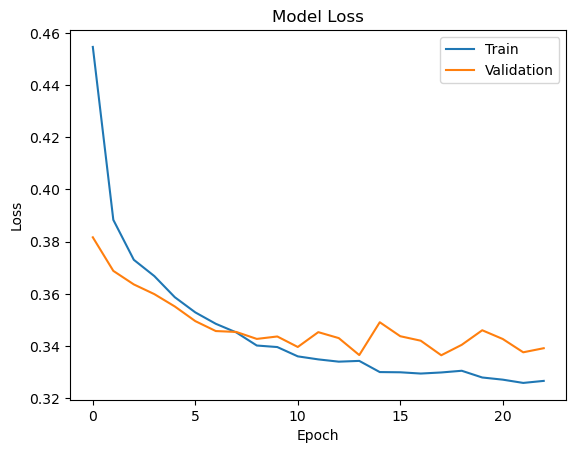

In [137]:
# Plot training and validation loss

def plot_loss(history):
    """
    Plots the training and validation loss over epochs.

    This function takes the training history of a model and generates a line plot
    showing the loss values for both the training and validation datasets.

    Parameters:
    history (History): A Keras History object containing the training loss and 
                       validation loss recorded during model training.
    """
    
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation"], loc="upper right")
    plt.show()


plot_loss(history)

In [138]:
### Create Predictions

In [139]:
# Create predictions
predictions = model.predict(X_test)
predictions.shape, y_test.shape

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


((3265, 1), (3265,))

In [140]:
# Create copies of the true target values for the test set
test_y_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)

# Inverse transform the scaled target values to get the original temperature values
true_temp = scaler.inverse_transform(test_y_copies)[:, 0]

# Use the model to predict values based on the test features
prediction = model.predict(X_test)

# Create copies of the predicted values to match the shape of the original features
prediction_copies = np.repeat(prediction, len(df_features.columns), axis = -1)

# Inverse transform the scaled predictions to get the original temperature values
prediction_temp = scaler.inverse_transform(prediction_copies)[:, 0]

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


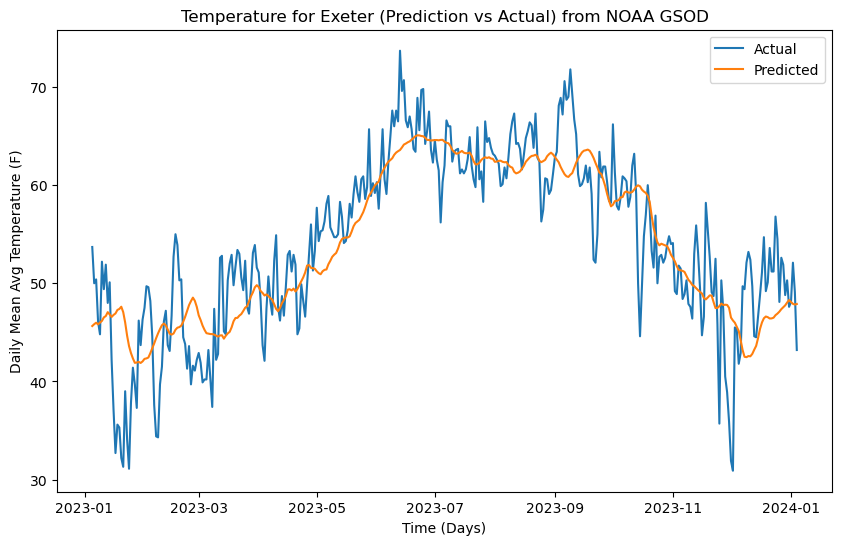

In [141]:
days_to_plot = 365

def plot_pred_vs_actual(true, pred, days_to_plot, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.plot(df_features.index[-days_to_plot:], true[-days_to_plot:], label="Actual")
    plt.plot(df_features.index[-days_to_plot:], pred[-days_to_plot:], label="Predicted")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


plot_pred_vs_actual(true=true_temp, 
                    pred=prediction_temp, 
                    days_to_plot=days_to_plot,
                    title="Temperature for Exeter (Prediction vs Actual) from NOAA GSOD",
                    xlabel="Time (Days)",
                    ylabel="Daily Mean Avg Temperature (F)"
                   )

**Consider how the model could be improved.** 
* Feature engineering - review the correlation matrix and consider features which could be droppped.
* Data - add more data.
* Hyperparameter optimisation - Learning rate, batch size, epochs.
* Model - adjust the model architecture.
* Regularization - dropout, L1/L2 regularization weights.
* Data preprocessing - different scaling / sequencing. 
   

**Other project ideas**
* Try changing the lead time and sequence length to find an optimum approach for this problem. 
* Try changing the target variable. Instead of trying to predict temperature, try some of the other variable such as wind speed. 